### Step 1: Load the Dataset

We start by loading the new dataset to inspect its structure and identify any potential issues such as missing values.


In [22]:
# Import necessary libraries
import pandas as pd

# Load the new dataset
df_new = pd.read_csv(r'C:\Users\owner\Desktop\OCR\OCR\telco.csv')

# Display the first few rows of the dataset
df_new.head()


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


### Step 2: Clean the Data

- Drop columns with too many missing values (`Churn Category`, `Churn Reason`).
- Check for remaining missing values and fill them with default values (e.g., 0).
- Convert the `Churn Label` to a binary format (Yes=1, No=0) for use as the target variable.


In [58]:
# Drop columns with excessive missing data
df_cleaned = df_new.drop(columns=['Churn Category', 'Churn Reason'])

# Check for missing values again
missing_values = df_cleaned.isnull().sum()

# Print missing values information
if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print(f"Missing values found:\n{missing_values[missing_values > 0]}")
    
# Handle remaining missing values (e.g., fill NaN with 0)
df_cleaned.fillna(0, inplace=True)

# Convert Churn Label (target) to binary: Yes=1, No=0
df_cleaned['Churn Label'] = df_cleaned['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)


Missing values found:
Offer            3877
Internet Type    1526
dtype: int64


### Step 3: Feature Engineering

We'll select meaningful features and encode categorical variables:
- Drop irrelevant columns (e.g., `Customer ID`, `Country`, `State`, etc.).
- Apply One-Hot Encoding to categorical columns like `Gender`, `Internet Type`, `Payment Method`, and `Contract`.


In [59]:
# Step 3: Feature Engineering and Encoding

# Drop irrelevant columns
df_cleaned = df_cleaned.drop(columns=['Customer ID', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Population'])

# Replace 'Yes' with 1 and 'No' with 0 in all columns where applicable
df_cleaned.replace({'Yes': 1, 'No': 0}, inplace=True)

# List of additional categorical columns that need encoding
categorical_columns = ['Under 30', 'Senior Citizen', 'Married', 'Dependents', 
                       'Referred a Friend', 'Quarter', 'Offer']

# Apply One-Hot Encoding to these categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Also apply One-Hot Encoding to previously identified columns
df_encoded = pd.get_dummies(df_encoded, columns=['Gender', 'Internet Type', 'Payment Method', 'Contract'], drop_first=True)

# Convert boolean columns to integers (True/False to 1/0)
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes(include='bool').columns})

# Display the first few rows of the cleaned and encoded data
df_encoded.head()


C:\Users\owner\AppData\Local\Temp\ipykernel_32448\799451117.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned.replace({'Yes': 1, 'No': 0}, inplace=True)


,Age,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Offer_Offer D,Offer_Offer E,Gender_Male,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Payment Method_Credit Card,Payment Method_Mailed Check,Contract_One Year,Contract_Two Year
0,78,0,0,1,0,0.00,0,1,8,0,...,0,0,1,0,1,0,0,0,0,0
1,74,1,1,8,1,48.85,1,1,17,0,...,0,1,0,0,0,1,1,0,0,0
2,71,3,0,18,1,11.33,1,1,52,0,...,1,0,1,0,0,1,0,0,0,0
3,78,1,1,25,1,19.76,0,1,12,0,...,0,0,0,0,0,1,0,0,0,0
4,80,1,1,37,1,6.33,1,1,14,0,...,0,0,0,0,0,1,0,0,0,0


### Step 4: Split the Data

Now that the dataset is cleaned and preprocessed, we will split it into training and test sets. The training set will be used to build the model, and the test set will evaluate its performance.


In [71]:
# Step 4: Splitting the Data

# Drop the 'Customer Status' column as it contains string values that can't be processed by the model
df_encoded = df_encoded.drop(columns=['Customer Status'])

# Ensure the target column (y) is numerical
# Convert 'Churned' to 1 and 'No Churn' to 0 in the 'Churn Label' column (if needed)
df_encoded['Churn Label'] = df_encoded['Churn Label'].replace({'Churned': 1, 'No Churn': 0})

# Check if the 'Churn Label' column is numeric and contains only 1 and 0
print(df_encoded['Churn Label'].unique())

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['Churn Label'])
y = df_encoded['Churn Label']

# Split the data into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# After splitting the data, check if y_train and y_test contain only 0 and 1
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())

# Check the shape of the resulting splits
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


[1 0]
Unique values in y_train: [1 0]
Unique values in y_test: [1 0]
Training set shape: (4930, 45)
Test set shape: (2113, 45)


### Step 5: Train a Model

We'll start with a simple **Logistic Regression** model as a baseline. Logistic regression is often used for binary classification problems like churn prediction. 


In [ ]:
# Step 5: Training the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


### Step 6: Model Evaluation

After training the model, it's important to evaluate its performance using various metrics. We'll be looking at the following:

1. **Accuracy**: The proportion of correctly predicted churn and non-churn customers out of the total predictions.
2. **Precision**: The proportion of true positives (correct churn predictions) out of all customers predicted to churn.
3. **Recall (Sensitivity)**: The proportion of actual churned customers that were correctly identified by the model.
4. **F1-Score**: The harmonic mean of precision and recall, balancing the trade-off between them.
5. **Confusion Matrix**: A table showing true positives, true negatives, false positives, and false negatives to get a clear picture of the model's performance.

#### Model Evaluation Metrics
We will calculate accuracy, precision, recall, and F1-score, followed by a visualization of the confusion matrix.


Accuracy: 0.9697113109323237
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1524
           1       0.95      0.94      0.95       589

    accuracy                           0.97      2113
   macro avg       0.96      0.96      0.96      2113
weighted avg       0.97      0.97      0.97      2113



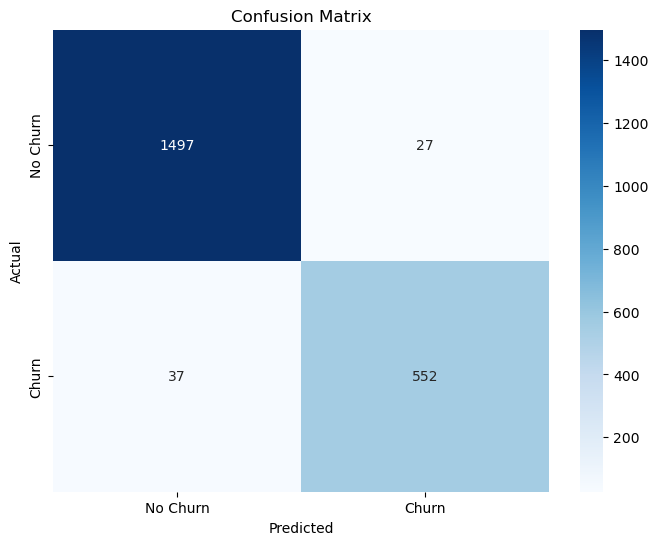

In [75]:
# Evaluate the model's performance using accuracy, precision, recall, and F1-score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#### Interpretation:

- **Accuracy**: Shows the overall percentage of correct predictions.
- **Precision**: High precision means that when the model predicts a customer will churn, it is correct most of the time.
- **Recall**: High recall means that the model is good at identifying most customers who will churn.
- **F1-Score**: A balance between precision and recall, particularly useful when the classes are imbalanced.
- **Confusion Matrix**: Visualizes the breakdown of true/false positives and negatives, helping to identify the model's strengths and weaknesses.
